Assignment: Flowers Recognition
Dataset Description:

This dataset contains 4242 images of flowers.
The data collection is based on the data flicr, google images, yandex images.
You can use this datastet to recognize plants from the photo.

Attribute Information:
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels.
Also explore how to resize images in tensorflow and then resize all the images to a same size.
This is a Multiclass Classification Problem.


Data :
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
tf.__version__

'2.8.2'

In [2]:
!ls -ahl

total 20K
drwxr-xr-x 1 root root 4.0K Aug  5 12:19 .
drwxr-xr-x 1 root root 4.0K Aug  5 12:18 ..
drwxr-xr-x 4 root root 4.0K Aug  3 20:20 .config
drwx------ 5 root root 4.0K Aug  5 12:19 drive
drwxr-xr-x 1 root root 4.0K Aug  3 20:21 sample_data


In [3]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!rm -Rf flowers
!unzip '/content/drive/MyDrive/New/archive.zip'

In [5]:
!ls flowers
!rm -Rf flowers/flowers
!rm -Rf data

daisy  dandelion  flowers  rose  sunflower  tulip


In [6]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import splitfolders
splitfolders.ratio('flowers', output="data", seed=1337, ratio=(0.7,0.2,0.1))


Copying files: 4326 files [00:01, 3926.63 files/s]


In [ ]:
import os
def files_count(base_dir):
  path=os.walk(base_dir,topdown=True)
  for root, directories, files in path:
   total=0
   for directory in directories:
    full_path=os.path.join(base_dir,directory)
    ln=len(os.listdir(full_path))
    print(full_path, ln)
    total=total+ln
    print("total", root, total)
files_count('flowers')
files_count('data/train')
files_count('data/val')
files_count('data/test')

In [9]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./225)
validation_datagen=ImageDataGenerator(rescale=1./225)

In [23]:
train_dir='data/train'
validation_dir='data/val'
test_dir='data/test'
batch_size=100
train_generator=train_datagen.flow_from_directory(
        'data/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')
validation_generator = validation_datagen.flow_from_directory(
        'data/val',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

Found 3022 images belonging to 5 classes.
Found 862 images belonging to 5 classes.


In [13]:
for data_batch, labels_batch in train_generator:
   print('data batch shape:', data_batch.shape)
   print('labels batch shape:', labels_batch.shape)
   break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 5)


In [42]:
from keras import models
from keras import layers
from keras import regularizers
from keras import optimizers
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(34, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [44]:

steps_per_epoch=3025//batch_size
validation_steps=862//batch_size
print(steps_per_epoch, validation_steps)
history=model.fit(train_generator,steps_per_epoch=steps_per_epoch,epochs=5
                  ,validation_data=validation_generator, validation_steps=validation_steps)

30 8
Epoch 1/5
30/30 [==============================] - 147s 5s/step - loss: 1.1684 - accuracy: 0.5257 - val_loss: 1.3760 - val_accuracy: 0.4150
Epoch 2/5
30/30 [==============================] - 154s 5s/step - loss: 1.0611 - accuracy: 0.5784 - val_loss: 1.1141 - val_accuracy: 0.5288
Epoch 3/5
30/30 [==============================] - 144s 5s/step - loss: 0.9905 - accuracy: 0.6126 - val_loss: 1.0539 - val_accuracy: 0.5975
Epoch 4/5
30/30 [==============================] - 145s 5s/step - loss: 0.9108 - accuracy: 0.6441 - val_loss: 1.1415 - val_accuracy: 0.5562
Epoch 5/5
30/30 [==============================] - 151s 5s/step - loss: 0.8692 - accuracy: 0.6708 - val_loss: 0.8733 - val_accuracy: 0.6687


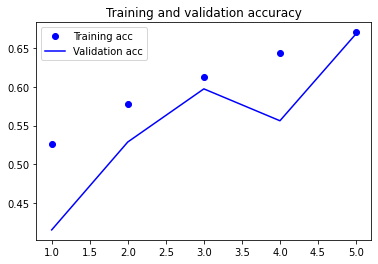

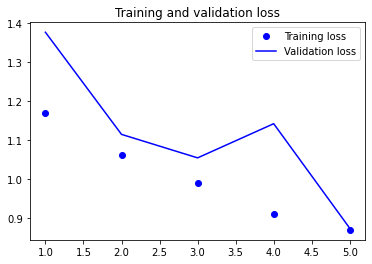

In [45]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [46]:
test_generator = validation_datagen.flow_from_directory(
        'data/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

Found 439 images belonging to 5 classes.


In [47]:
testing_steps=439// batch_size
testing=model.evaluate(test_generator,steps=testing_steps)

4/4 [==============================] - 6s 1s/step - loss: 0.8406 - accuracy: 0.7000
